# simple 2 layer  neural network for XOR gate from scratch
Feed forwad equations
\begin{align*}
&z^1 = w^1 x + b^1 \\
&a^1 = f(z^1) \\
&z^2 = w^2 a^1 + b^2 \\
&a^2 = f(z^2) 
\end{align*}

loss fuction: cross entropy loss (binary classfication in this case)
$$
l = -\frac{1}{N} {(y \cdot \log(a^2) + (1-y) \cdot \log(1-a^2)))}
$$
Where N is number of training data, y is the true label, $a^2$ is output of the network.

Backpropagation Equations
\begin{align*}
&\frac{\partial l}{\partial a^2} = \frac{1}{N} \cdot \frac{a^2-y}{a^2 (1-a^2)} \\
&\frac{\partial a^2}{\partial z^2} = f(z^2) \cdot (1-f(z^2)) = a^2 (1-a^2) \\
&\frac{\partial l}{\partial z^2} = \frac{\partial l}{\partial a^2} \cdot \frac{\partial a^2}{\partial z^2} =\frac{1}{N} \cdot (a^2 -y)
\end{align*}

\begin{align*}
&\frac{\partial l}{\partial w^2} =  \frac{\partial l}{\partial z^2} \cdot \frac{\partial z^2}{\partial w^2} = \frac{1}{N} \cdot (a^2 -y)(a^1)^T \\
&\frac{\partial l}{\partial b^2} =  \frac{\partial l}{\partial z^2} \cdot \frac{\partial z^2}{\partial b^2} = \frac{1}{N} \cdot (a^2 -y) \cdot 1
\end{align*}

\begin{align*}
&\frac{\partial l}{\partial a^1} = \frac{\partial l}{\partial z^2} \cdot \frac{\partial z^2}{\partial a^1} =  \frac{1}{N} \cdot (w^2)^T(a^2 -y) \\
&\frac{\partial l}{\partial z^1} = \frac{\partial l}{\partial a^1} \cdot \frac{\partial a^1}{\partial z^1} = \frac{1}{N} \cdot  (w^2)^T(a^2 -y) \cdot a^1(1-a^1) \\
&\frac{\partial l}{\partial w^1} = \frac{\partial l}{\partial z^1} \cdot \frac{\partial z^1}{\partial w^1} =  \frac{1}{N} \cdot (w^2)^T(a^2 -y) \cdot a^1(1-a^1) \cdot X^T \\
&\frac{\partial l}{\partial b^1} = \frac{\partial l}{\partial z^1} \cdot \frac{\partial z^1}{\partial b^1} =  \frac{1}{N} \cdot (w^2)^T(a^2 -y) \cdot a^1(1-a^1) \cdot 1
\end{align*}

outputs: 4
losses: 0.030587094164801213


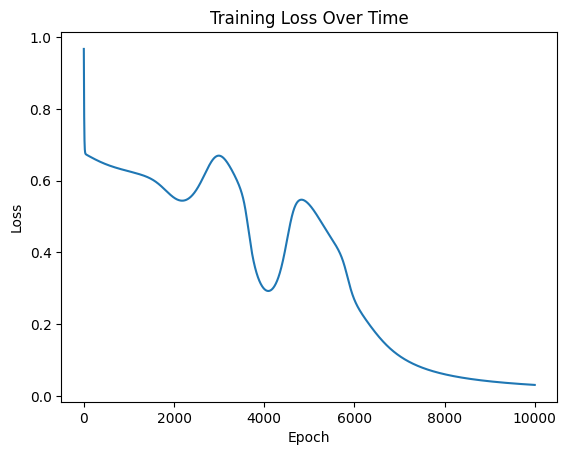

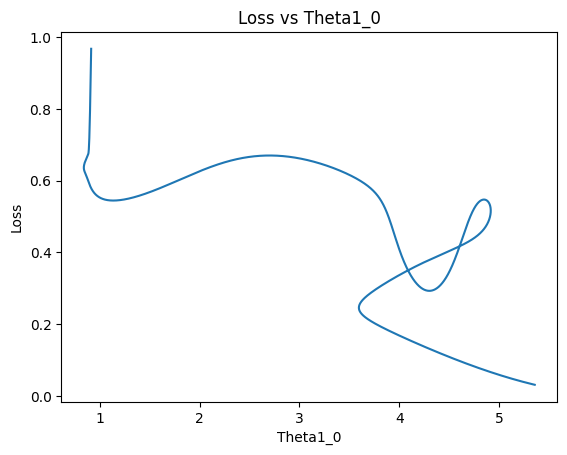

shape: 4
Input: [[0 0]], Prediction: [[0.01967    0.10380478 0.11078612 0.12596967]]
Input: [[0 1]], Prediction: [[0.02550626 0.97935393 0.98303138 0.52879526]]
Input: [[1 0]], Prediction: [[0.04733837 0.96383497 0.95910951 0.01426754]]
Input: [[1 1]], Prediction: [[0.4767246  0.91919242 0.87198687 0.03905653]]


In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Defining the Neural Network for XOR
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        np.random.seed(314)
        self.theta1 = np.random.rand(hidden_size, input_size)
        self.theta2 = np.random.rand(output_size, hidden_size)
        self.bias1 = np.random.rand(hidden_size)
        self.bias2 = np.random.rand(output_size)
       
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward_run(self, input):
        z1 = np.dot(self.theta1, input) + self.bias1
        a1 = self.sigmoid(z1)
        z2 = np.dot(self.theta2, a1) + self.bias2
        a2 = self.sigmoid(z2)
        return a2, a1
    
    def back_propagate(self, input, output, a2, a1):
        delta_a2 = (1 / output.shape[0])*(a2 - output)/(a2*(1-a2))
        delta_z2 = delta_a2 * self.sigmoid_derivative(a2)
        d_theta2 = np.dot(delta_z2, a1.T)
        d_bias2 = np.sum(delta_z2, axis=1)  # Sum across columns for each bias
        delta_a1 = np.dot(self.theta2.T, delta_z2)
        delta_z1 = delta_a1 * self.sigmoid_derivative(a1)
        d_theta1 = np.dot(delta_z1, input.T)
        d_bias1 = delta_z1
        d_bias1 = np.sum(delta_z1, axis=1)  # Sum across columns for each bias

        return d_theta2, d_theta1, d_bias2,  d_bias1
        
    def loss(self, output, a2):
        # cross entropy loss
        return - (1 / output.shape[0]) * np.sum(output * np.log(a2) + (1 - output) * np.log(1 - a2))
        # squared error loss
        # return np.sum((output - a2) ** 2) / output.shape[0]

# XOR Training Data
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T
outputs = np.array([0, 1, 1, 0])
print(f"outputs: {outputs.shape[0]}")

# Network Parameters
input_size = 2
hidden_size = 4
output_size = 1
learning_rate = 0.1
epochs = 10000

# Initialize and Train the Network
nn = NeuralNetwork(input_size, hidden_size, output_size)


losses = []
theta1_0 = []
for epoch in range(epochs):
    a2, a1 = nn.forward_run(inputs)
    d_theta2, d_theta1, d_bias2, d_bias1 = nn.back_propagate(inputs, outputs, a2, a1)
    nn.theta2 -= learning_rate * d_theta2
    nn.theta1 -= learning_rate * d_theta1
    nn.bias2 -= learning_rate * d_bias2
    nn.bias1 -= learning_rate * d_bias1
    theta1_0.append(nn.theta1 [0][0])
    loss = nn.loss(outputs, a2)
    losses.append(loss)

# print the last losses
print(f"losses: {losses[-1]}")
# Plot the Loss over Time
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Time')
plt.show()

# plot the relationship between the loss and nn.theta2
plt.plot(theta1_0, losses)
plt.xlabel('Theta1_0')
plt.ylabel('Loss')
plt.title('Loss vs Theta1_0')
plt.show()


# Testing the Neural Network
test_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T
print(f"shape: {test_inputs.shape[1]}")
for i in range(test_inputs.shape[1]):
    input = test_inputs[:, [i]]
    prediction = nn.forward_run(input)
    print(f"Input: {test_inputs[:, [i]].T}, Prediction: {prediction[0]}")

# Testing the Neural Network
# test_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T
# for i in range(test_inputs.shape[0]):  # Iterate over rows, not columns
#     input = test_inputs[i].reshape(1, -1)  # Reshape input for forward_run
#     prediction = nn.forward_run(input)
#     print(f"Input: {input.T}, Prediction: {prediction[0][0]}")
